In [1]:
import os
import json

def get_data(folder_name):
    x = []
    y = []
    positions = []
    file_names = []

    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = os.path.join(folder_name, file[:-4])

            file_text = open(file_name + '.txt', encoding='utf8')
            try:
                file_truth = open(file_name + '.truth', encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = truth['changes']
                    truth_positions = truth['positions']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    file_names.append(file[:-4])
                finally:
                    file_truth.close()
            finally:
                file_text.close()

    return x, y, positions, file_names

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
def custom_sent_tokenize(text):
    sentences = []
    paragraphs = [p for p in text.split('\n') if p]
    for paragraph in paragraphs:
        sentences.extend(sent_tokenize(paragraph))
        
    return sentences

In [39]:
text='Tower Aggro The enemy towers are dangerous. They have lots of health, armor, and a powerful attack that can quickly decimate low-level heroes. It\'s important, then, to know how the turret picks its target. The current metagame theory is that teams with a jungler > teams without, so by playing a strong jungler (assuming you aren\'t overestimating your skill) will give you the best odds, as an early game lead can be hard to overcome. Executions also don\'t show up on the "Team Kills" tally, though they do appear under a champion\'s deaths. Shen Shen is probably up in the top 3 with Amumu and Rammus when it comes to tanks (in my mind at least). If you can learn to correctly handle his Energy (which can be a little tricky to get the hang of at first), a good Shen player can be phenomenal. He\'s got a damage shield, an AoE Taunt, and a global ult / ally savior mechanic. One thing to note is that you don\'t want to build dodge on Shen - build armor/MR and health instead: it makes his passive come up more often and for more damage. Beyond that, everything else is automatic. If you die or use recall, you\'ll refresh your sighstones for sure.'

In [40]:
print(text)

Tower Aggro The enemy towers are dangerous. They have lots of health, armor, and a powerful attack that can quickly decimate low-level heroes. It's important, then, to know how the turret picks its target. The current metagame theory is that teams with a jungler > teams without, so by playing a strong jungler (assuming you aren't overestimating your skill) will give you the best odds, as an early game lead can be hard to overcome. Executions also don't show up on the "Team Kills" tally, though they do appear under a champion's deaths. Shen Shen is probably up in the top 3 with Amumu and Rammus when it comes to tanks (in my mind at least). If you can learn to correctly handle his Energy (which can be a little tricky to get the hang of at first), a good Shen player can be phenomenal. He's got a damage shield, an AoE Taunt, and a global ult / ally savior mechanic. One thing to note is that you don't want to build dodge on Shen - build armor/MR and health instead: it makes his passive come

In [41]:
def segment_tokenize(text, n=2):
    segments = []
    sentences = custom_sent_tokenize(text)
    x = len(sentences)
    i = 0
    for i in range(0, x-x%n-n, n):
        segments.append(' '.join(sentences[i:i+n]))
    segments.append(' '.join(sentences[i+n:]))
    
    return segments

In [42]:
for s in segment_tokenize(text):
    print(s)
    print('-------')

Tower Aggro The enemy towers are dangerous. They have lots of health, armor, and a powerful attack that can quickly decimate low-level heroes.
-------
It's important, then, to know how the turret picks its target. The current metagame theory is that teams with a jungler > teams without, so by playing a strong jungler (assuming you aren't overestimating your skill) will give you the best odds, as an early game lead can be hard to overcome.
-------
Executions also don't show up on the "Team Kills" tally, though they do appear under a champion's deaths. Shen Shen is probably up in the top 3 with Amumu and Rammus when it comes to tanks (in my mind at least).
-------
If you can learn to correctly handle his Energy (which can be a little tricky to get the hang of at first), a good Shen player can be phenomenal. He's got a damage shield, an AoE Taunt, and a global ult / ally savior mechanic.
-------
One thing to note is that you don't want to build dodge on Shen - build armor/MR and health in

In [4]:
import pandas as pd

TRAINING_DIR = '../data/training'

X, y, positions, file_names = get_data(
    TRAINING_DIR)
df = pd.DataFrame(data={'text': X, 'label': y, 'filename': file_names, 'pos':positions})
df['num_sent'] = [len(custom_sent_tokenize(d)) for d in df.text]
df['num_splits'] = [len(x) for x in df.pos]

In [5]:
from nltk.corpus import stopwords
def only_stop_words(text):
    result = ''
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    for w in words:
        if w in stop_words:
            result=result+' '+ w
        
    return result

In [6]:
only_stop_words(df.text[0])

' at your that it is an out how your is what is the a should you to your in any all your and the you to the before your s your the of the you had to be about your in the and a than a with and you can all of with and if you your as a to do any on your the should be as a to and that should be to the you can a by the in by the but why do i this above most from the as the you have not a a that you are i but the some more are they the from to on a this the should be of the of what is to when you have a how do you now it is that during the in such a the that they the to only what is the and if this and you to more during the this in a and the how to with this during the our each with an and this is a which in a and but this is the the on the down in the after this we to the as as the on of the at i this is a but if the is a with a to the of the the to the during the of you to what you are and after a have a and just do it doing is the more during the this is from but at to the does for a of 

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np

def stop_word_vectors(data):
    vectors = []
    vect = TfidfVectorizer(max_features=20)
    vect.fit([only_stop_words(d) for d in data])
    
    for d in data:
        segments = segment_tokenize(d)
        train_x = vect.transform([only_stop_words(s) for s in segments]).toarray()
        vectors.append(np.std(train_x, axis=0))
    
    return vectors, vect.get_feature_names()

In [8]:
X, names = stop_word_vectors(df.text)

In [9]:
X = np.array(X)

In [10]:
for i in range(len(names)):
    df[names[i]] = X[:,i]

In [11]:
from sklearn.feature_selection import SelectKBest, chi2
ch2 = SelectKBest(chi2, k=10)
X_train = ch2.fit_transform(X, df.label)
best = [names[i] for i in ch2.get_support(indices=True)]

In [12]:
best

['and', 'be', 'but', 'in', 'is', 'of', 'that', 'the', 'to', 'you']

In [13]:
scores = -np.log10(ch2.pvalues_)
print('-------------------------------------------')
for score, name in sorted(zip(scores, names), key=lambda tup: tup[0], reverse=True):
    print(name + ':', score)
print('-------------------------------------------')

-------------------------------------------
you: 1.0982526279128668
the: 1.0267969120387495
to: 0.9415203860103977
is: 0.8439032397127593
of: 0.7857444731705397
be: 0.6145082932043628
that: 0.6137771616963013
but: 0.5752804516253053
in: 0.5670669473087021
and: 0.556056963758888
this: 0.5034491803815542
it: 0.4976117652099396
are: 0.4938909812356666
for: 0.4776330908884904
as: 0.4524438170020882
not: 0.4423611018262211
or: 0.437641680772703
on: 0.41844105138547055
have: 0.3581812552619103
with: 0.33301287419402537
-------------------------------------------


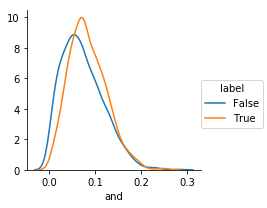

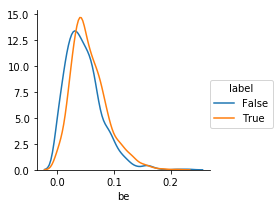

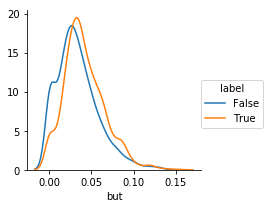

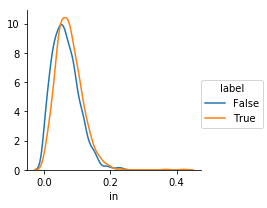

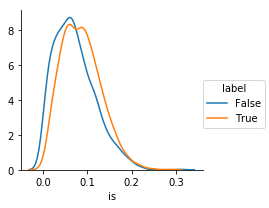

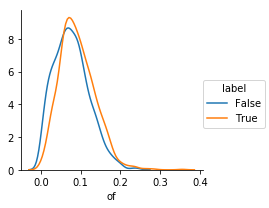

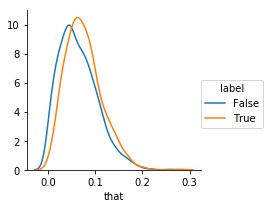

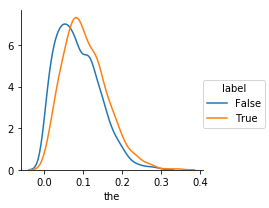

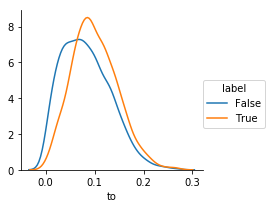

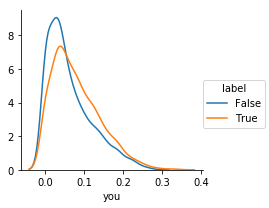

In [14]:
import seaborn as sns
for name in best:
    plt.figure()
    sns.FacetGrid(df, hue="label") \
       .map(sns.kdeplot, name) \
       .add_legend()